In [66]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


def chem_osc(Y, t, a, b):
    x, y = Y
    dxdt = 1 - ((1+a)*x) + (b*x*x*y)
    dydt = (a*x) - (b*x*x*y)
    dYdt = [dxdt, dydt]
    return dYdt


class Baseline_model:
    def __init__(self, a, b, t0=0, t_end=10):
        self.a = a
        self.b = b
        self.t = np.linspace(t0, t_end, (t_end - t0)*200)
        self.solutions = []
    
    def get_solutions(self, initials, dfdt):
        """ Initials is a list or np.array with pairs of initial values (x0, y0). 
        dfdt is the function that gives the derivatives. (see documentation of 
        scipy.integrate.odeint)"""
        self.solutions = [odeint(dfdt, list(start), self.t, args=(self.a, self.b)) for start in initials]
        return self.solutions
    
    def base_plot(self, num_arrows=12, L_arrow=0.03, lwd=1.4, L_width=0.002, L_head=0.01, savename=None):
        solutions = np.array(self.solutions)
        fig, ax = plt.subplots(1, figsize=(8, 8))
        ax.set_title(r"phase space; $\alpha$ = " + str(self.a) + r", $\beta$ = " + str(self.b))
        for sol in solutions:
            ax.plot(sol[:, 0], sol[:, 1], "black", linewidth=lwd)
        
        # plot some arrows
        min_x = np.min(np.array(solutions)[:, :, 0])
        max_x = np.max(np.array(solutions)[:, :, 0])
        min_y = np.min(np.array(solutions)[:, :, 1])
        max_y = np.max(np.array(solutions)[:, :, 1])

        x_space = np.linspace(min_x, max_x, num_arrows)
        y_space = np.linspace(min_y, max_y, num_arrows)
        # calculate some arguments
        scale = np.sqrt((((max_x - min_x)**2) + ((max_y - min_y)**2)))
        Lx_arrow_scale = L_arrow * (max_x - min_x)
        Ly_arrow_scale = L_arrow * (max_y - min_y)
        arrow_width = scale * L_width
        head_width = scale * L_head
        
        for x in x_space:
            for y in y_space:
                dxdt, dydt = chem_osc([x, y], _, a=self.a, b=self.b)
                # calculate the steps for the arrow
                Lx = Lx_arrow_scale * dxdt / np.sqrt(((dxdt**2) + (dydt**2)))
                Ly = Ly_arrow_scale * dydt / np.sqrt(((dxdt**2) + (dydt**2)))
                ax.arrow(x-(0.5*Lx), y-(0.5*Ly), Lx, Ly,
                          width=arrow_width,
                          head_width=head_width,
                          alpha=0.5,
                          color="black",
                          linestyle="solid")

        ax.set_xlabel(r"$\hat{x}$")
        ax.set_ylabel(r"$\hat{y}$")
        if savename is not None:
            plt.savefig(savename)
        plt.show()
        return

    def main_plot(self, num_arrows=12, L_arrow=0.03, lwd=1.4, L_width=0.002, L_head=0.01, savename=None):
        # force solutions to be a numpy array
        solutions = np.array(self.solutions)
        # check if (0, 0) is in the initials and make that one red
        initials = list(zip(solutions[:, 0, 0], solutions[:, 0, 1]))
        if (0, 0) in initials:
            i_red = initials.index((0, 0))
        else:
            i_red = -1

        # make the plots
        fig = plt.figure(constrained_layout=True, figsize=(12, 8))
        gs = fig.add_gridspec(2, 3)
        ax1 = fig.add_subplot(gs[:, :-1])
        ax1.set_title(r"phase space; $\alpha$ = " + str(self.a) + r", $\beta$ = " + str(self.b))
        ax2 = fig.add_subplot(gs[0, -1])
        ax2.set_title(r"$\hat{x}$ over time $\hat{t}$")
        ax3 = fig.add_subplot(gs[1, -1])
        ax3.set_title(r"$\hat{y}$ over time $\hat{t}$")
        ax2.sharex(ax3)

        # plot solutions
        for i, sol in enumerate(solutions): 
            if i == i_red:
                color = 'red'
                ax2.plot(self.t, sol[:, 0], color, linewidth=lwd)
                ax3.plot(self.t, sol[:, 1], color, linewidth=lwd)
                ax1.plot(sol[:, 0], sol[:, 1], color, linewidth=lwd, zorder=10)
            else:
                color = 'black'
                ax1.plot(sol[:, 0], sol[:, 1], color, linewidth=lwd, zorder=0)

        # plot some arrows
        min_x = np.min(np.array(solutions)[:, :, 0])
        max_x = np.max(np.array(solutions)[:, :, 0])
        min_y = np.min(np.array(solutions)[:, :, 1])
        max_y = np.max(np.array(solutions)[:, :, 1])

        x_space = np.linspace(min_x, max_x, num_arrows)
        y_space = np.linspace(min_y, max_y, num_arrows)
        # calculate some arguments
        scale = np.sqrt((((max_x - min_x)**2) + ((max_y - min_y)**2)))
        Lx_arrow_scale = L_arrow * (max_x - min_x)
        Ly_arrow_scale = L_arrow * (max_y - min_y)
        arrow_width = scale * L_width
        head_width = scale * L_head
        
        for x in x_space:
            for y in y_space:
                dxdt, dydt = chem_osc([x, y], _, a=self.a, b=self.b)
                # calculate the steps for the arrow
                Lx = Lx_arrow_scale * dxdt / np.sqrt(((dxdt**2) + (dydt**2)))
                Ly = Ly_arrow_scale * dydt / np.sqrt(((dxdt**2) + (dydt**2)))
                ax1.arrow(x-(0.5*Lx), y-(0.5*Ly), Lx, Ly,
                          width=arrow_width,
                          head_width=head_width,
                          alpha=0.5,
                          color="black",
                          linestyle="solid")

        # set the x and y labels
        ax1.set(xlabel=r"$\hat{x}$", ylabel=r"$\hat{y}$")
        ax2.set(xlabel=r"$\hat{t}$", ylabel=r"$\hat{x}$")
        ax3.set(xlabel=r"$\hat{t}$", ylabel=r"$\hat{y}$")
        if savename is not None:
            plt.savefig(savename)
        plt.show()
        return
    
    
    

## Stabiele knoop 1

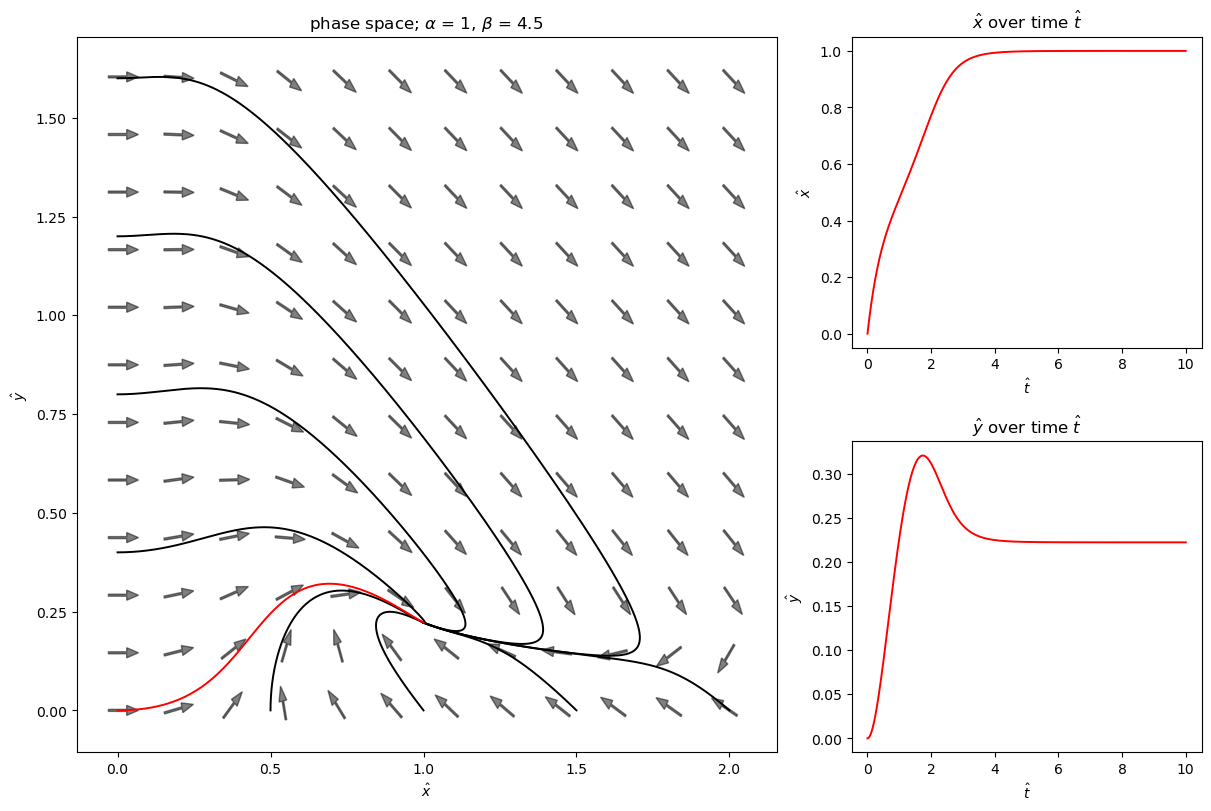

In [58]:
y0s = [0, 0.4, 0.8, 1.2, 1.6]
x0s = [0.5, 1, 1.5, 2]

inits = list(zip([0]*len(y0s), y0s)) + list(zip(x0s, [0]*len(x0s)))

base_mdl = Baseline_model(a=1, b=4.5, t0=0, t_end=10)
base_mdl.get_solutions(inits, chem_osc)
base_mdl.main_plot(savename="stableNode1.png")


## Stabiele knoop 2

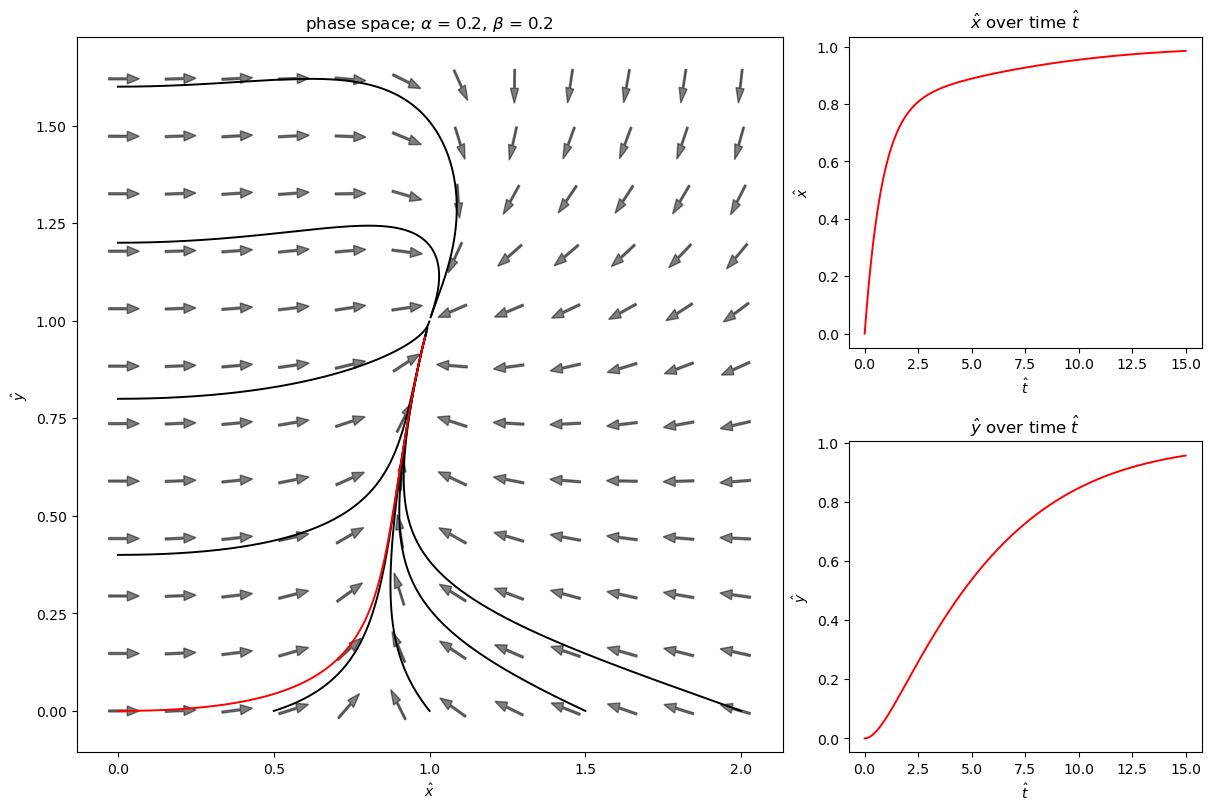

In [59]:
y0s = [0, 0.4, 0.8, 1.2, 1.6]
x0s = [0.5, 1, 1.5, 2]

inits = list(zip([0]*len(y0s), y0s)) + list(zip(x0s, [0]*len(x0s)))

base_mdl = Baseline_model(a=0.2, b=0.2, t0=0, t_end=15)
base_mdl.get_solutions(inits, chem_osc)
base_mdl.main_plot(savename="stableNode2.png")




## Stabiele focus

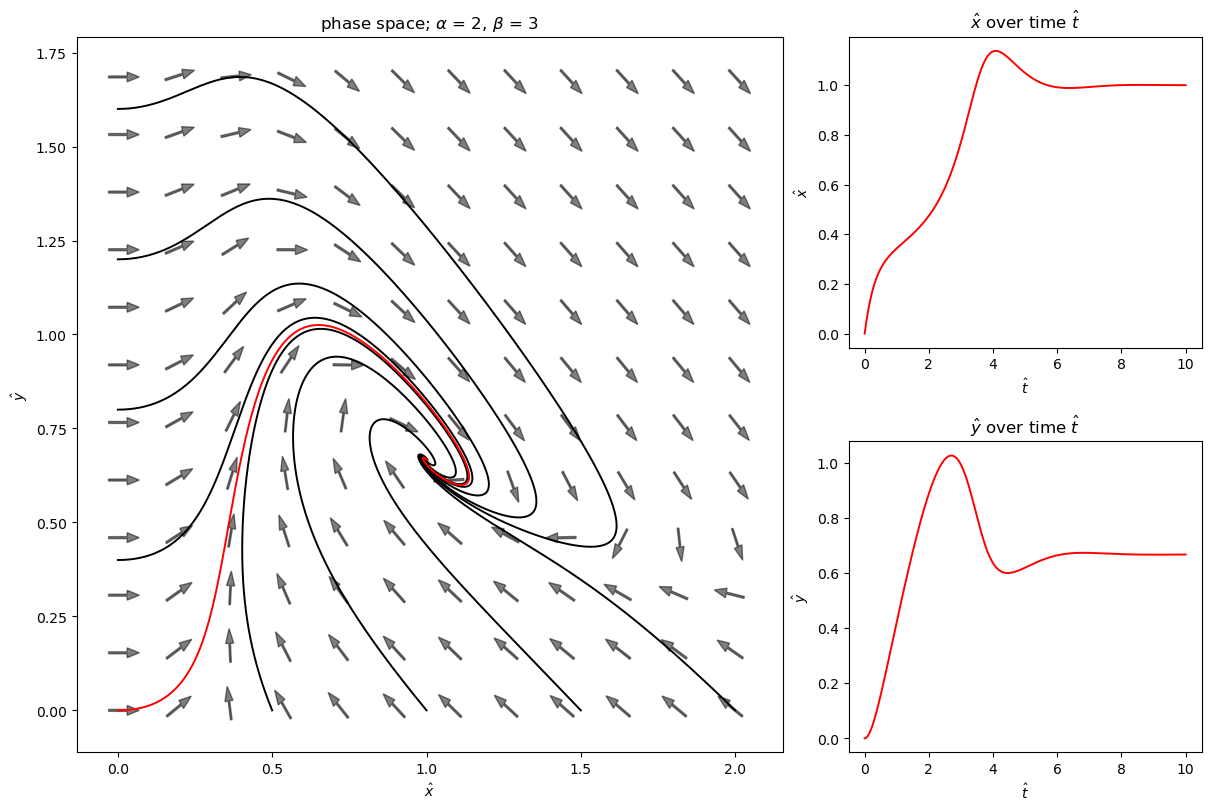

In [60]:
y0s = [0, 0.4, 0.8, 1.2, 1.6]
x0s = [0.5, 1, 1.5, 2]

inits = list(zip([0]*len(y0s), y0s)) + list(zip(x0s, [0]*len(x0s)))

base_mdl = Baseline_model(a=2, b=3, t0=0, t_end=10)
base_mdl.get_solutions(inits, chem_osc)
base_mdl.main_plot(savename="stableFocus.png")



## Stabiel centrum

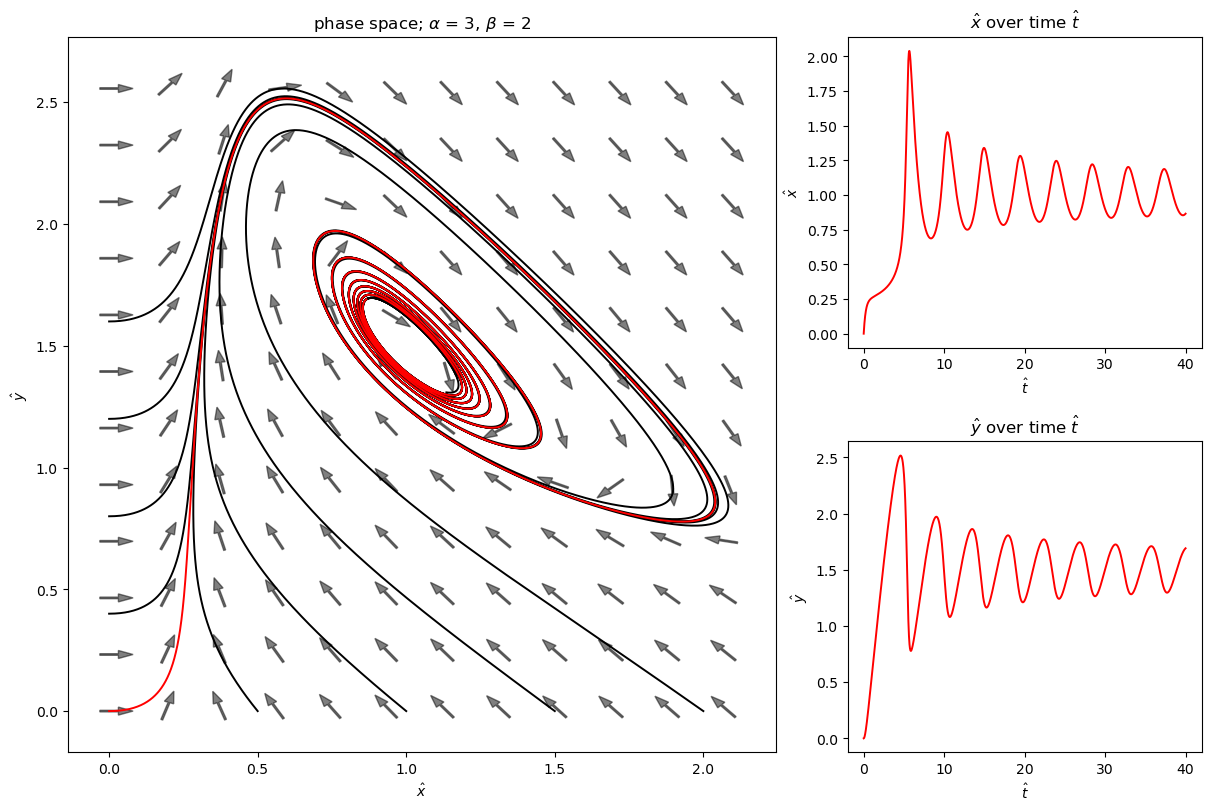

In [61]:
y0s = [0, 0.4, 0.8, 1.2, 1.6]
x0s = [0.5, 1, 1.5, 2]

inits = list(zip([0]*len(y0s), y0s)) + list(zip(x0s, [0]*len(x0s)))

base_mdl = Baseline_model(a=3, b=2, t0=0, t_end=40)
base_mdl.get_solutions(inits, chem_osc)
base_mdl.main_plot(savename="centre.png")




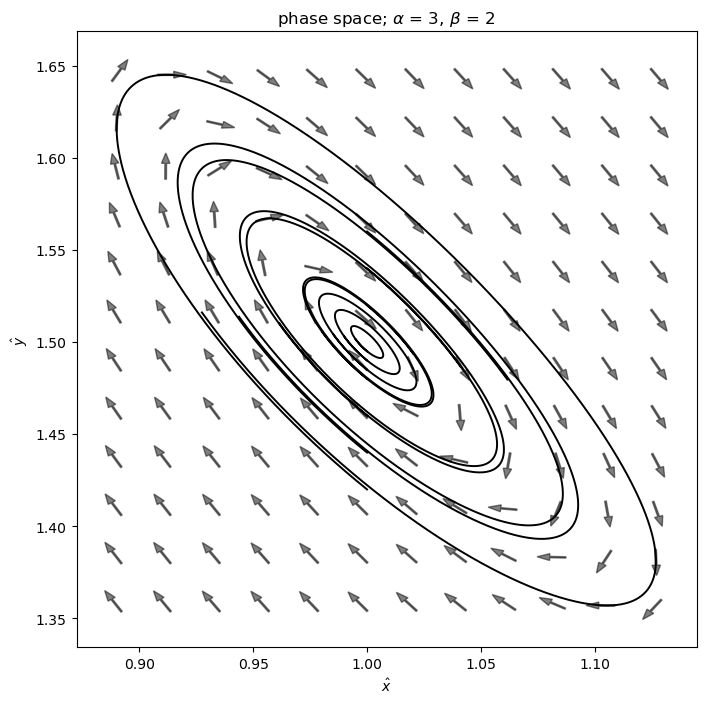

In [67]:
y0s = [1.42, 1.44, 1.46, 1.48, 1.485, 1.490, 1.495, 1.5, 1.52, 1.54, 1.56]
inits = list(zip([1]*len(y0s), y0s))

base_mdl = Baseline_model(a=3, b=2, t0=0, t_end=5)
base_mdl.get_solutions(inits, chem_osc)
base_mdl.base_plot(savename="centreZoom.png")


## Instabiele focus

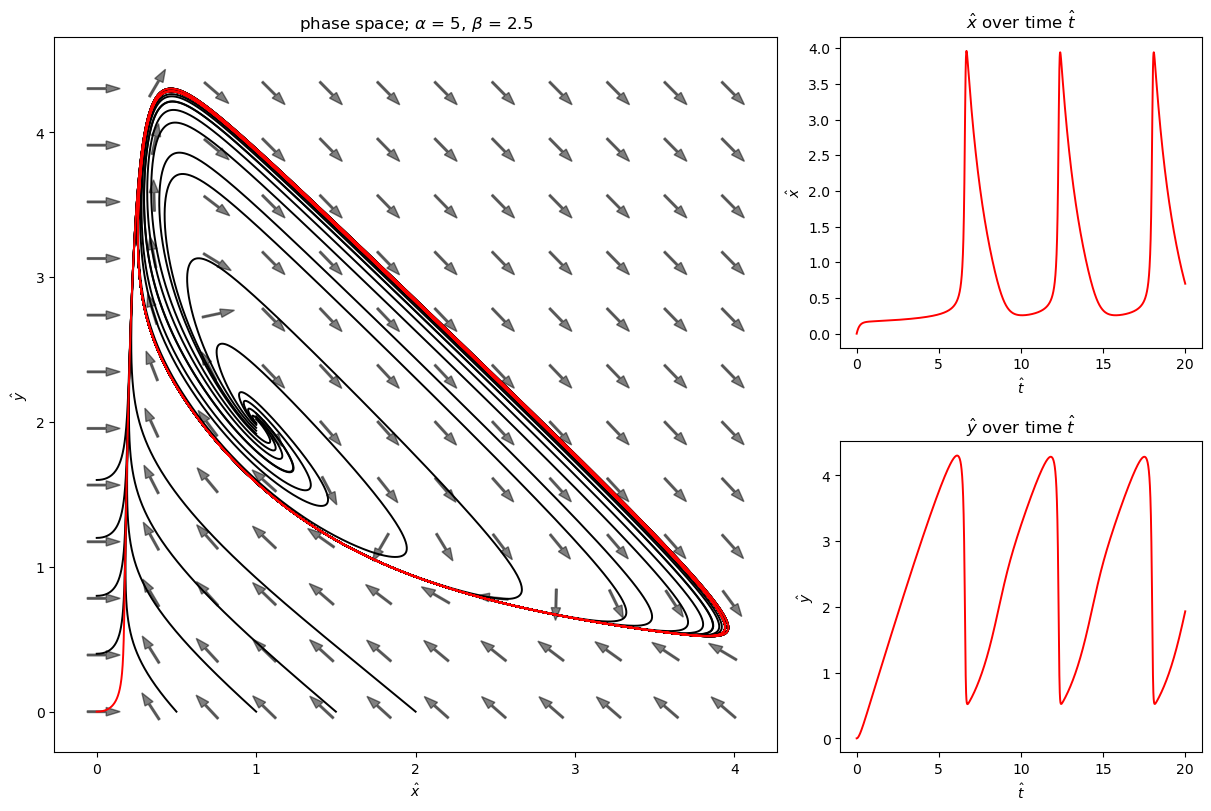

In [63]:

y0s_close = [1.92, 1.94, 1.96, 1.98, 1.985, 1.990, 1.995, 2.0, 2.02, 2.04, 2.06]

y0s = [0, 0.4, 0.8, 1.2, 1.6]
x0s = [0.5, 1, 1.5, 2]

inits = list(zip([0]*len(y0s), y0s)) + list(zip(x0s, [0]*len(x0s))) + list(zip([1]*len(y0s_close), y0s_close))

base_mdl = Baseline_model(a=5, b=2.5, t0=0, t_end=20)
base_mdl.get_solutions(inits, chem_osc)
base_mdl.main_plot(savename="unstableFocus.png")



## Instabiele knoop

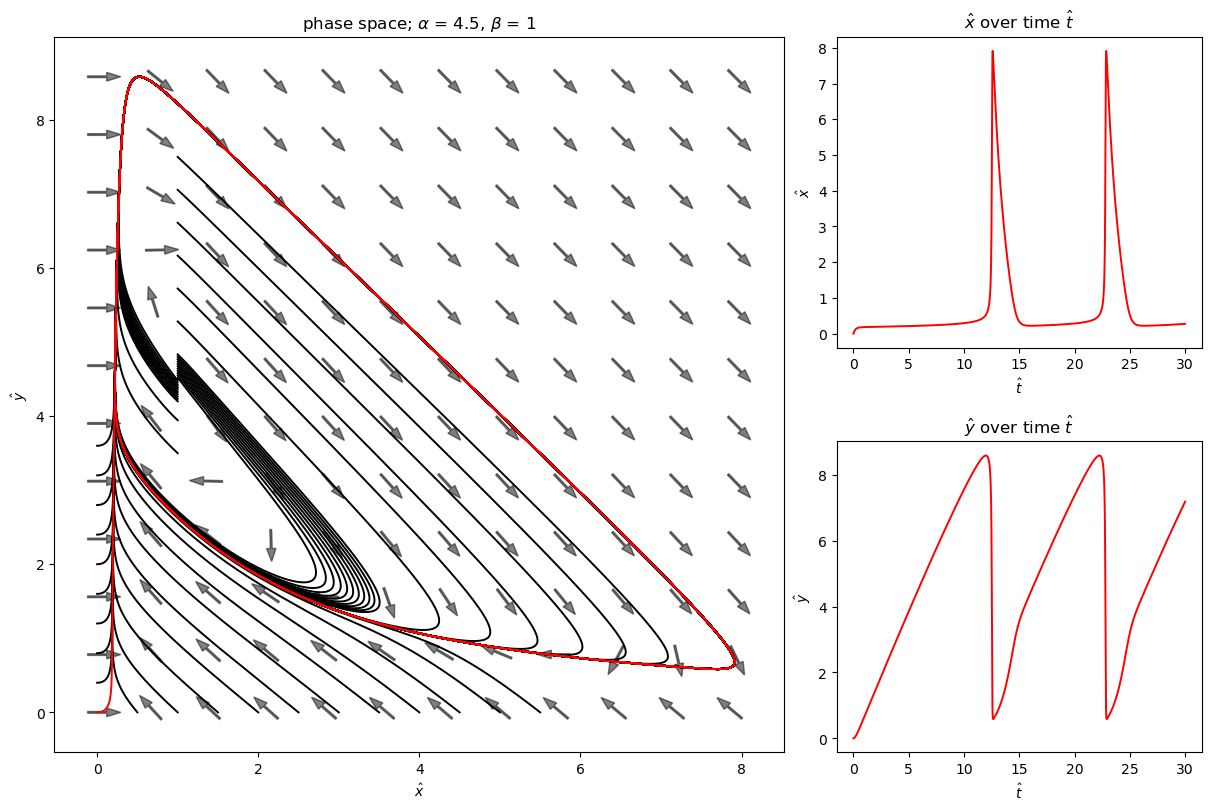

In [65]:
y0s = [0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 2.8, 3.2, 3.6]
x0s = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5]

y_close = np.linspace(3.5, 7.5, 10)
y_close2 = np.linspace(4.2, 4.8, 20)

inits = list(zip([0]*len(y0s), y0s)) + list(zip(x0s, [0]*len(x0s))) + list(zip([1]*len(y_close), y_close)) + list(zip([1]*len(y_close2), y_close2))

base_mdl = Baseline_model(a=4.5, b=1, t0=0, t_end=30)
base_mdl.get_solutions(inits, chem_osc)
base_mdl.main_plot(savename="unstableNode.png")
